In [1]:
import pandas as pd
import numpy as np
import us
from cleanco import cleanco
from fuzzywuzzy import fuzz
import distance
import re
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
sp500_final = pd.read_csv('sp500_cleaned.csv',encoding='utf-8')

In [3]:
sp500_names = sp500_final['NAME']

In [4]:
def clean_name(x):
    x=str(x)
    x = x.replace("U.S.","")
    return cleanco(x).clean_name()

def calc_similarity(comp_name):
    high = 0
    company = comp_name
    for i,sp in sp500_names.iteritems():
        if 1-distance.jaccard(comp_name,sp) > .7:
            val = fuzz.ratio(comp_name, sp)
            if val > high:
                high = val
                company = sp
    return company, high

In [5]:
data = pd.read_csv('capstone-goldman-sachs/src/clean/macro/master_macro_cleaned_naics.csv',dtype=str, usecols=['CASE_SUBMITTED','EMPLOYER_NAME','EMPLOYER_CITY','EMPLOYER_STATE','TOTAL_WORKERS','SOC_NAME','SOC_CODE','NAICS_CLASSIFICATION'])
data.CASE_SUBMITTED = pd.to_datetime(data.CASE_SUBMITTED)
data['YEAR'] = data.CASE_SUBMITTED.apply(lambda x: x.year)
data=data[data.YEAR>=2010].copy(deep=True)
data['EMPLOYER_NAME']=data.EMPLOYER_NAME.apply(lambda x: str(x).upper())

In [6]:
data['CLEAN_NAME']=data.EMPLOYER_NAME.apply(clean_name)

In [7]:
clean_name_counts = data.CLEAN_NAME.value_counts()
data_names = data.CLEAN_NAME.unique()

In [8]:
comp_dict = {}
for name in data_names:
    comp, value = calc_similarity(name)
    if value > 94:
        if comp in comp_dict.keys():
            comp_dict[comp].add(name)
        else:
            comp_dict[comp]=set([name])

{'3M': {'3M'},
 'A.O. SMITH': {'A. O. SMITH', 'A.O. SMITH'},
 'ABBOTT LABORATORIES': {'ABBOTT LABORATORIES'},
 'ABBVIE': {'ABBVIE'},
 'ACCENTURE': {'ACCENTURE'},
 'ACUITY BRANDS': {'ACUITY BRANDS'},
 'ADOBE SYSTEMS': {'ADOBE SYSTEMS'},
 'ADVANCED MICRO DEVICES': {'ADVANCED MICRO DEVICES'},
 'AES': {'AES'},
 'AFFILIATED MANAGERS GROUP': {'AFFILIATED MANAGERS GROUP'},
 'AFLAC': {'AFLAC'},
 'AGILENT TECHNOLOGIES': {'AGILENT TECHNOLOGIES'},
 'AKAMAI TECHNOLOGIES': {'AKAMAI TECHNOLOGIES', 'AKMAMAI TECHNOLOGIES'},
 'ALBEMARLE': {'ALBEMARLE'},
 'ALEXANDRIA REAL ESTATE EQUITIES': {'ALEXANDRIA REAL ESTATE EQUITIES'},
 'ALEXION PHARMACEUTICALS': {'ALEXION PHARMACEUTICALS',
  'LEXICON PHARMACEUTICALS'},
 'ALIGN TECHNOLOGY': {'ALIGN TECHNOLOGY'},
 'ALLEGION': {'ALLEGION'},
 'ALLIANT ENERGY': {'ALLIANT ENERGY'},
 'ALPHABET': {'ALPHABET'},
 'ALTRIA GROUP': {'ATRIA GROUP'},
 'AMERICAN ELECTRIC POWER': {'AMERICAN ELECTRIC POWER'},
 'AMERICAN EXPRESS': {'AMERICAN EXPRESS'},
 'AMERICAN INTERNATIONAL GRO

In [9]:
reverse = {}
for final_name in comp_dict.keys():
    name_list = comp_dict[final_name]
    for name in name_list:
        reverse[name]=final_name

{'3M': '3M',
 'A. O. SMITH': 'A.O. SMITH',
 'A.O. SMITH': 'A.O. SMITH',
 'ABBOTT LABORATORIES': 'ABBOTT LABORATORIES',
 'ABBVIE': 'ABBVIE',
 'ACCENTURE': 'ACCENTURE',
 'ACUITY BRANDS': 'ACUITY BRANDS',
 'ADOBE SYSTEMS': 'ADOBE SYSTEMS',
 'ADVANCED MICRO DEVICES': 'ADVANCED MICRO DEVICES',
 'AES': 'AES',
 'AFFILIATED MANAGERS GROUP': 'AFFILIATED MANAGERS GROUP',
 'AFLAC': 'AFLAC',
 'AGILENT TECHNOLOGIES': 'AGILENT TECHNOLOGIES',
 'AKAMAI TECHNOLOGIES': 'AKAMAI TECHNOLOGIES',
 'AKMAMAI TECHNOLOGIES': 'AKAMAI TECHNOLOGIES',
 'ALBEMARLE': 'ALBEMARLE',
 'ALEXANDRIA REAL ESTATE EQUITIES': 'ALEXANDRIA REAL ESTATE EQUITIES',
 'ALEXION PHARMACEUTICALS': 'ALEXION PHARMACEUTICALS',
 'ALIGN TECHNOLOGY': 'ALIGN TECHNOLOGY',
 'ALLEGION': 'ALLEGION',
 'ALLIANT ENERGY': 'ALLIANT ENERGY',
 'ALPHABET': 'ALPHABET',
 'AMERICAN ELECTRIC POWER': 'AMERICAN ELECTRIC POWER',
 'AMERICAN EXPRESS': 'AMERICAN EXPRESS',
 'AMERICAN INTERNATIONAL GROUP': 'AMERICAN INTERNATIONAL GROUP',
 'AMERICAN WATER WORKS COMPANY'

In [10]:
common_names = ["STARBUCKS COFFEE","BLIZZARD ENTERTAINMENT","SPRINT","STAPLES","UBER TECHNOLOGIES","MCKINSEY & COMPANY, INC. UNITED STATES","TWITTER","GLOBALFOUNDRIES","THE BOSTON CONSULTING GROUP","RITE AID", "LINKEDIN","ERICSSON","BLOOMBERG","EMC","TATA CONSULTANCY SERVICES", "WIPRO", "UST GLOBAL","IGATE TECHNOLOGIES","SYNTEL CONSULTING","SATYAM COMPUTER SERVICES","FUJITSU AMERICA","MPHASIS","HEXAWARE TECHNOLOGIES","KPMG","NTT DATA", "L&T TECHNOLOGY SERVICES","MINDTREE","YAHOO","HTC GLOBAL SERVICES","HTC GLOBAL SERVICES","VMWARE"]
amazon_names = ["AMAZON CORPORATE","AMAZON WEB SERVICES"]
ibm_names = ["IBM INDIA PRIVATE","IBM","IBM INDIA","IBM INDIA PVT"]
alphabet_names = ["GOOGLE"]
qualcomm_names = ["QUALCOMM TECHNOLOGIES","QUALCOMM ATHEROS","QUALCOMM INNOVATION CENTER"]
bofa_names = ["BANK OF AMERICA N.A","MERRILL LYNCH"]
oracle_names = ["ORACLE AMERICA","ORACLE FINANCIAL SERVICES SOFTWARE"]
capgemini_names = ["CAPGEMINI FINANCIAL SERVICES USA","CAPGEMINI AMERICA", "CAPGEMINI"]
hcl_names = ["HCL GLOBAL SYSTEMS", "HCL AMERICA"]
walmart_names = ["WAL-MART ASSOCIATES"]
gs_names = ["GOLDMAN SACHS NEW JERSEY","GOLDMAN, SACHS","GOLDMAN SACHS SERVICES","GOLDMAN SACHS"]
capone_names = ["CAPITAL ONE SERVICES","CAPITAL ONE SERVICES II","CAPITAL ONE, NATIONAL ASSOCIATION"]
deloitte_names = ["DELOITTE FINANCIAL ADVISORY SERVICES","DELOITTE TRANSACTIONS AND BUSINESS ANALYTICS","DELOITTE &AMP; TOUCHE","DELOITTE TAX", "DELOITTE CONSULTING","DELOITTE & TOUCHE"] 
pwc_names = ["PRICEWATERHOUSECOOPERS ADVISORY SERVICES","PRICEWATERHOUSECOOPERS"]
cvs_names = ["CVS RX SERVICES","CVS PHARMACY"]
lt_names = ["LARSEN AND TOUBRO INFOTECH","LARSEN & TOUBRO","LARSEN & TOUBRO INFOTECH","LARSEN & TOUBRO TECHNOLOGY SERVICES"]
infosys_names = ["INFOSYTECH SOLUTIONS","INFOSYS BPO","INFOSYS TECHNOLOGIES","INFOSYS","INFOSYS PUBLIC SERVICES"]
ms_names = ["MORGAN STANLEY & CO","MORGAN STANLEY SERVICES GROUP"]
samsung_names = ["SAMSUNG RESEARCH AMERICA","SAMSUNG AUSTIN SEMICONDUCTOR","SAMSUNG INFORMATION SYSTEMS AMERICA","SAMSUNG TELECOMMUNICATIONS AMERICA","SAMSUNG ELECTRONICS AMERICA","SAMSUNG","SAMSUNG SEMICONDUCTOR"]
dell_names = ["DELL MARKETING","DELL","DELL USA","DELL PRODUCTS"]
mahindra_names = ["TECH MAHINDRA ( AMERICAS","TECH MAHINDRA (AMERICAS),INC", "TECH MAHINDRA (AMERICAS"]
citi_names = ["CITICORP CREDIT SERVICES, INC. (USA","CITIGROUP TECHNOLOGY","CITIBANK, N.A","CITIUSTECH","CITIGROUP GLOBAL MARKETS"]
verizon_names = ["VERIZON DATA SERVICES"]
hp_names = ["HEWLETT-PACKARD","HP ENTERPRISE SERVICES"]
att_names = ["AT&T SERVICES"]
comcast_names = ["COMCAST CABLE COMMUNICATIONS"]
blackrock_names = ["BLACKROCK FINANCIAL MANAGEMENT"]
fidelity_names = ["FIDELITY TECHNOLOGY GROUP"]
aa_names = ["AMERICAN AIRLINES"]
accenture_names = ["ACCENTURE TECHNOLOGY SOLUTIONS"]
jpm_names = ["JPMORGAN CHASE &AMP"]
ey_names = ["ERNST &AMP; YOUNG", "ERNST & YOUNG"]
tesla_names = ["TESLA MOTORS","TESLA"]
mastercard_names = ["MASTERCARD INTERNATIONAL"]
amex_names = ["AMERICAN EXPRESS TRAVEL RELATED SERVICES CO"]
def match_name(x):
    if str(x) == 'HEWLETT PACKARD ENTERPRISE':
        return "HP"
    elif str(x) in reverse.keys():
        return reverse[x]
    elif str(x) in common_names:
        return x
    elif str(x) in amazon_names:
        return "AMAZON.COM"
    elif str(x) in ibm_names:
        return "INTERNATIONAL BUSINESS MACHINES"
    elif str(x) in alphabet_names:
        return "ALPHABET"
    elif str(x) in bofa_names:
        return "BANK OF AMERICA"
    elif str(x) in qualcomm_names:
        return "QUALCOMM"
    elif str(x) in oracle_names:
        return "ORACLE"
    elif str(x) in capgemini_names:
        return "CAPGEMINI"
    elif str(x) in hcl_names:
        return "HCL"
    elif str(x) in walmart_names:
        return "WAL-MART STORES"
    elif str(x) in gs_names:
        return "GOLDMAN SACHS GROUP"
    elif str(x) in capone_names:
        return "CAPITAL ONE FINANCIAL"
    elif str(x) in deloitte_names:
        return "DELOITTE & TOUCHE"
    elif str(x) in pwc_names:
        return "PRICEWATERHOUSECOOPERS"
    elif str(x) in cvs_names:
        return "CVS HEALTH"
    elif str(x) in lt_names:
        return "LARSEN & TOUBRO"
    elif str(x) in infosys_names:
        return "INFOSYS"
    elif str(x) in ms_names:
        return "MORGAN STANLEY"
    elif str(x) in samsung_names:
        return "SAMSUNG"
    elif str(x) in dell_names:
        return "DELL"
    elif str(x) in mahindra_names:
        return "TECH MAHINDRA"
    elif str(x) in citi_names:
        return "CITIGROUP"
    elif str(x) in verizon_names:
        return "VERIZON COMMUNICATIONS"
    elif str(x) in hp_names:
        return "HP"
    elif str(x) in att_names:
        return "AT&T"
    elif str(x) in comcast_names:
        return "COMCAST"
    elif str(x) in blackrock_names:
        return "BLACKROCK"
    elif str(x) in fidelity_names:
        return "FIDELITY NATIONAL INFORMATION SERVICES"
    elif str(x) in aa_names:
        return "AMERICAN AIRLINES GROUP"
    elif str(x) in accenture_names:
        return "ACCENTURE"
    elif str(x) in jpm_names:
        return "JPMORGAN CHASE"
    elif str(x) in ey_names:
        return "ERNST & YOUNG"
    elif str(x) in tesla_names:
        return "TESLA MOTORS"
    elif str(x) in mastercard_names:
        return "MASTERCARD"
    elif str(x) in amex_names:
        return "AMERICAN EXPRESS"
    else:
        return None

In [11]:
data['MATCHED_NAME'] = data.CLEAN_NAME.apply(match_name)

In [12]:
relevant = data[~pd.isnull(data.MATCHED_NAME)].copy(deep=True)

In [13]:
date_soc = '[0-9]{4}-[0-9]{2}-[0-9]{2} [0-9]{2}:[0-9]{2}:[0-9]{2}'
dot_soc = '[0-9]{2}-[0-9]{4}.[0-9]{2}'
dot_soc_1 = '[0-9]{2}-[0-9]{4}.[0-9]{1}'
rand_soc = '[0-9]{2}-[0-9]{4}\.'
right_soc = '[0-9]{2}-[0-9]{4}'

def clean_SOC(x):
    if pd.isnull(x):
        return x
    x=str(x).replace(' ','')
    if re.match(date_soc,x):
        return "{}-{}".format(x[x.index('-')+1:x.index('-')+3],x[:x.index('-')])
    elif re.match(dot_soc,x):
        return x[:-3]
    elif re.match(dot_soc_1,x):
        return x[:-2]
    elif re.match(rand_soc,x):
        return x[:x.index('.')]
    elif re.match(right_soc,x):
        return x
    else:
        return np.nan
def cat_SOC(x):
    if not pd.isnull(x):
        return x[:2]
    else:
        return x

In [14]:
relevant['CLEAN_SOC_CODE']=relevant.SOC_CODE.apply(clean_SOC)
relevant['SOC_CATEGORY']=relevant.CLEAN_SOC_CODE.apply(cat_SOC)

In [15]:
SOC_CODES = relevant.CLEAN_SOC_CODE.unique()
EMP_NAMES = relevant.MATCHED_NAME.unique()
SOC_CAT_CODES = relevant.SOC_CATEGORY.unique()
NAICS_CODES = relevant.NAICS_CLASSIFICATION.unique()

In [16]:
relevant_dfs=[]
relevant_dfs_detailed=[]
for year in range(2010,2018):
    temp_df = relevant[relevant.YEAR==year].copy(deep=True)
    empty_df = pd.DataFrame(columns=SOC_CAT_CODES, index=EMP_NAMES)
    empty_df_detailed = pd.DataFrame(columns=SOC_CODES, index=EMP_NAMES)
    for i, row in temp_df.iterrows():
        existing_val = empty_df.get_value(index=row.MATCHED_NAME, col=row.SOC_CATEGORY)
        existing_val_detailed = empty_df_detailed.get_value(index=row.MATCHED_NAME, col=row.CLEAN_SOC_CODE)
        if np.isnan(float(existing_val)):
            empty_df.set_value(index=row.MATCHED_NAME, col=row.SOC_CATEGORY, value=float(row.TOTAL_WORKERS))
        else:
            empty_df.set_value(index=row.MATCHED_NAME, col=row.SOC_CATEGORY, value=existing_val+float(row.TOTAL_WORKERS))
        if np.isnan(float(existing_val_detailed)):
            empty_df_detailed.set_value(index=row.MATCHED_NAME, col=row.CLEAN_SOC_CODE, value=float(row.TOTAL_WORKERS))
        else:
            empty_df_detailed.set_value(index=row.MATCHED_NAME, col=row.CLEAN_SOC_CODE, value=existing_val+float(row.TOTAL_WORKERS))
    relevant_dfs.append(empty_df.fillna(0))
    relevant_dfs_detailed.append(empty_df_detailed.fillna(0))

8

In [17]:
naics_df = pd.DataFrame(columns=NAICS_CODES, index=EMP_NAMES)
for i, row in relevant.iterrows():
    naics_df.set_value(index=row.MATCHED_NAME, col=row.NAICS_CLASSIFICATION, value=1)

In [18]:
total_df = relevant_dfs[-1]
year = 2010
for item in relevant_dfs[:len(relevant_dfs)-1]:
    diff = int((2017-year)/2)
    decay = 1*np.power((1-.4),diff)
    year+=1
    total_df = total_df + diff*item

In [19]:
total_df_detailed = relevant_dfs_detailed[-1]
year = 2010
for item in relevant_dfs_detailed[:len(relevant_dfs_detailed)-1]:
    diff = int((2017-year)/2)
    decay = 1*np.power((1-.4),diff)
    year+=1
    total_df_detailed = total_df_detailed + diff*item

In [20]:
sim_eucl = euclidean_distances(total_df)
cat_dict_euc={}
for i in range(len(sim_eucl)):
    name = EMP_NAMES[i]
    cat_dict_euc[name]=[]
    for j in range(len(sim_eucl[i])):
        cat_dict_euc[name].append((EMP_NAMES[j],sim_eucl[i][j]))
    cat_dict_euc[name].sort(key=lambda tup:tup[1], reverse=False)

In [21]:
sim_eucl_detailed = euclidean_distances(total_df_detailed)
cat_dict_euc_detailed={}
for i in range(len(sim_eucl)):
    name = EMP_NAMES[i]
    cat_dict_euc_detailed[name]=[]
    for j in range(len(sim_eucl_detailed[i])):
        cat_dict_euc_detailed[name].append((EMP_NAMES[j],sim_eucl_detailed[i][j]))
    cat_dict_euc_detailed[name].sort(key=lambda tup:tup[1], reverse=False)

In [22]:
sim_cos = cosine_similarity(total_df)
cat_dict_cos={}
for i in range(len(sim_cos)):
    name = EMP_NAMES[i]
    cat_dict_cos[name]=[]
    for j in range(len(sim_cos[i])):
        cat_dict_cos[name].append((EMP_NAMES[j],sim_cos[i][j]))
    cat_dict_cos[name].sort(key=lambda tup:tup[1], reverse=True)

In [23]:
sim_cos_detailed = cosine_similarity(total_df_detailed)
cat_dict_cos_detailed={}
for i in range(len(sim_cos_detailed)):
    name = EMP_NAMES[i]
    cat_dict_cos_detailed[name]=[]
    for j in range(len(sim_cos_detailed[i])):
        cat_dict_cos_detailed[name].append((EMP_NAMES[j],float(sim_cos_detailed[i][j])))
    cat_dict_cos_detailed[name].sort(key=lambda tup:tup[1], reverse=True)

In [24]:
import copy

sim_eucl_detailed_mod = copy.deepcopy(sim_eucl_detailed)
for i in range(len(sim_eucl_detailed)):
    sim_eucl_detailed_mod[i] = 1-(sim_eucl_detailed_mod[i]/max(sim_eucl_detailed_mod[i]))

In [25]:
emp_naic={}
for i, row in relevant.iterrows():
    if row.MATCHED_NAME in emp_naic.keys():
        emp_naic[row.MATCHED_NAME].add(row.NAICS_CLASSIFICATION)
    else:
        emp_naic[row.MATCHED_NAME] = set([row.NAICS_CLASSIFICATION])

In [26]:
def evaluate(eucl, cos, eucl_weight, cos_weight, EMP_NAMES, emp_naic):
    weighted = get_weighted_sim(eucl, cos, eucl_weight, cos_weight)
    long_cat = get_long_cat(weighted, EMP_NAMES)
    short_cat = get_short_cat(long_cat)
    return get_evaluation_ratio(short_cat, emp_naic)

def get_weighted_sim(sim_eucl_detailed_mod, sim_cos_detailed, eucl_weight, cos_weight):
    return (eucl_weight*sim_eucl_detailed_mod)+(cos_weight*sim_cos_detailed)

def get_long_cat(sim_weighted_detailed, EMP_NAMES):
    cat_dict_weighted_detailed={}
    for i in range(len(sim_weighted_detailed)):
        name = EMP_NAMES[i]
        cat_dict_weighted_detailed[name]=[]
        for j in range(len(sim_weighted_detailed[i])):
            cat_dict_weighted_detailed[name].append((EMP_NAMES[j],float(sim_weighted_detailed[i][j])))
        cat_dict_weighted_detailed[name].sort(key=lambda tup:tup[1], reverse=True)
    return cat_dict_weighted_detailed

def get_short_cat(cat_dict_weighted_detailed):
    short_cat_detailed = {}
    for x in cat_dict_weighted_detailed.keys():
        last = cat_dict_weighted_detailed[x][:11]
        final=[]
        for (i, j) in last:
            if i!=x:
                final.append((i,j))
        short_cat_detailed[x]=final
    return short_cat_detailed

def get_evaluation_ratio(short_cat_detailed, emp_naic):
    total = 0
    for name in short_cat_detailed.keys():
        temp = 0
        relevant_naics = emp_naic[name]
        similar_names = short_cat_detailed[name]
        for sim_name, value in similar_names:
            temp2 = 0
            sim_naics = emp_naic[sim_name]
            for sn in sim_naics:
                if sn in relevant_naics:
                    temp2=1
            temp+=temp2
        ratio = float(temp)/10.0
        total+=ratio
    return total/len(short_cat_detailed)

In [27]:
ratios = np.arange(0,1,.05)
results = []
for r in ratios:
    results.append(evaluate(sim_eucl_detailed_mod, sim_cos_detailed, r, 1-r, EMP_NAMES, emp_naic))

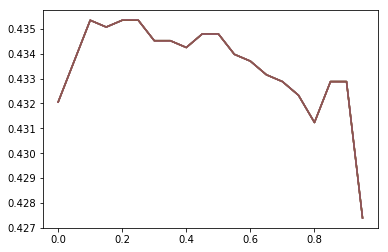

In [39]:
import matplotlib.pyplot as plt
plt.plot(ratios,results)
plt.xlabel('Euclidean Distance Weight')
plt.ylabel('Result Relevance')
plt.show()

In [42]:
f = open('ratio_vals.csv','w')
for r in results:
    f.write('{},'.format(r))
f.close()

In [29]:
sim_weighted_detailed=(.2*sim_eucl_detailed_mod)+ (.8*sim_cos_detailed)

In [30]:
cat_dict_weighted_detailed={}
for i in range(len(sim_weighted_detailed)):
    name = EMP_NAMES[i]
    cat_dict_weighted_detailed[name]=[]
    for j in range(len(sim_weighted_detailed[i])):
        cat_dict_weighted_detailed[name].append((EMP_NAMES[j],float(sim_weighted_detailed[i][j])))
    cat_dict_weighted_detailed[name].sort(key=lambda tup:tup[1], reverse=True)

In [31]:
def find_weighted_detailed(x):
    last = cat_dict_weighted_detailed[x][:11]
    final=[]
    for (i, j) in last:
        if i!=x:
            final.append((i,j))
    return final

In [32]:
interact(find_weighted_detailed, x=sorted(list(cat_dict_weighted_detailed.keys())))

<function __main__.find_weighted_detailed>